In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\bank-marketing.csv")

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA (Exploratory data analysis) 

In [5]:
df.shape

(45211, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
#numerical variables summary statistics
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
#return the random guess if we had to predict if and  will response yes or not
random_guess = 1-len(df[df['response']=='yes'])/df.shape[0]
random_guess

0.8830151954170445

if we had to random guess if an customer will say yes or not, we willing to accept 88.30% of the time. We will compare this results with the prediction from our model.

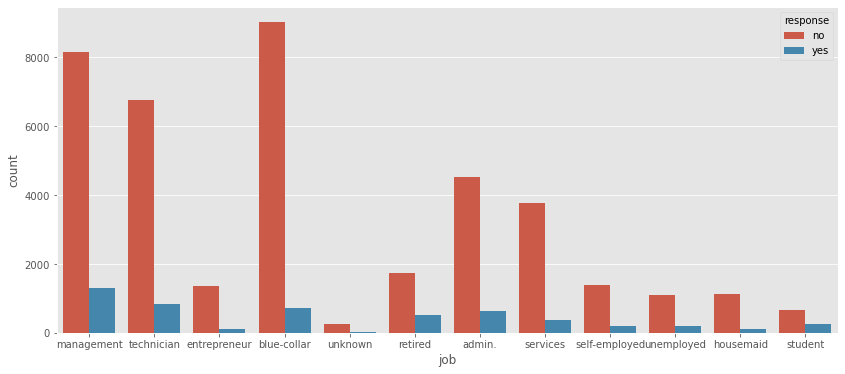

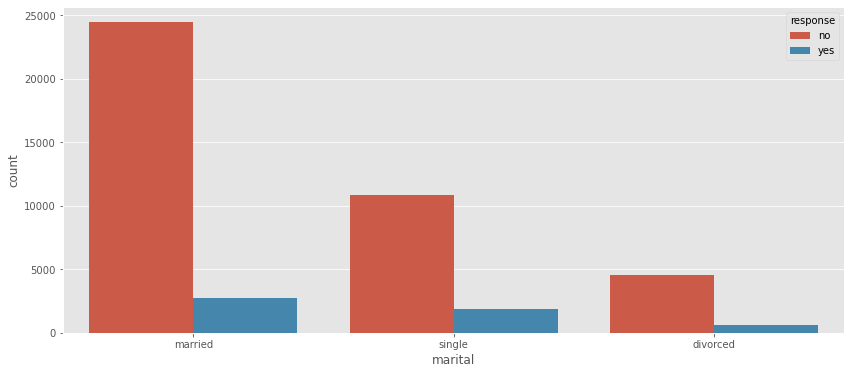

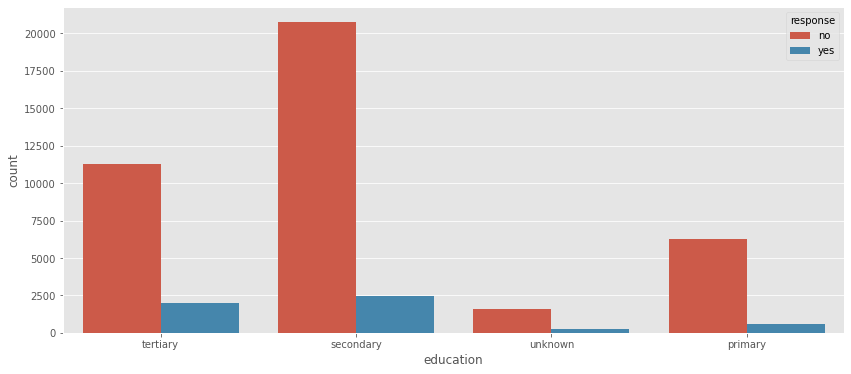

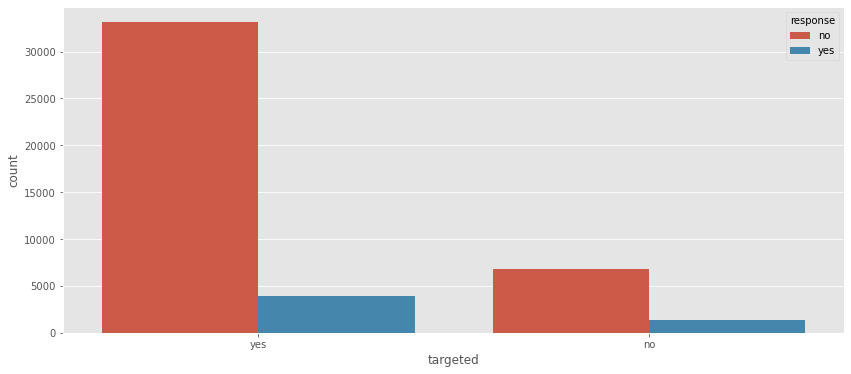

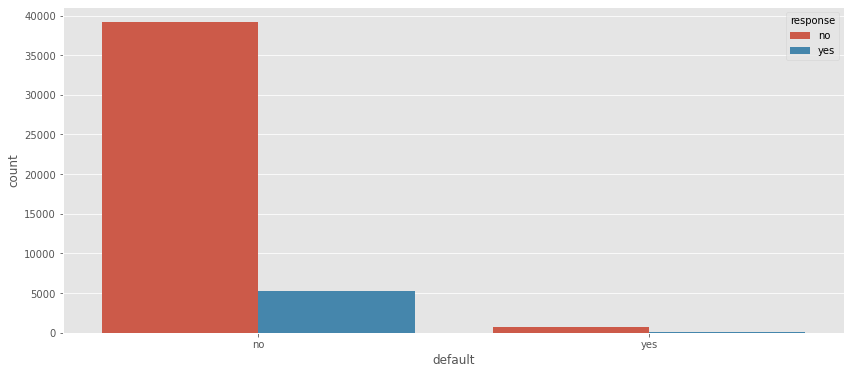

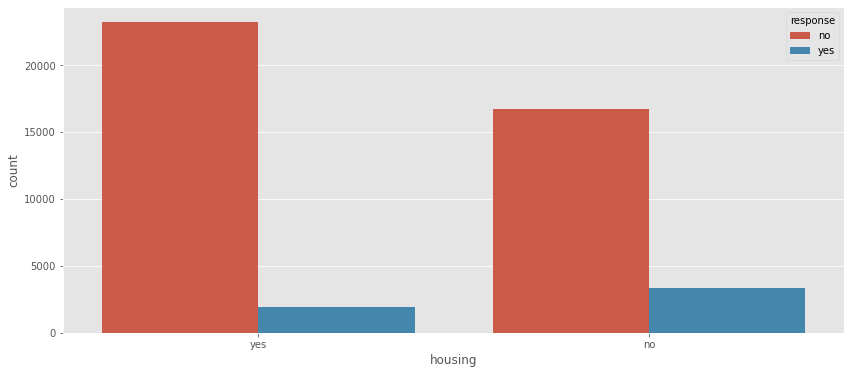

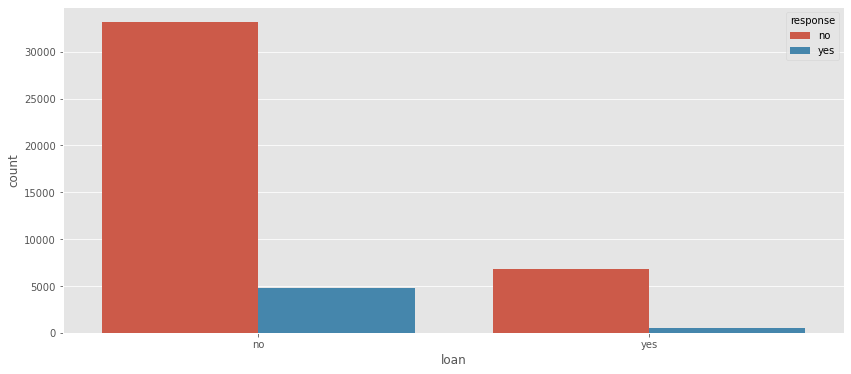

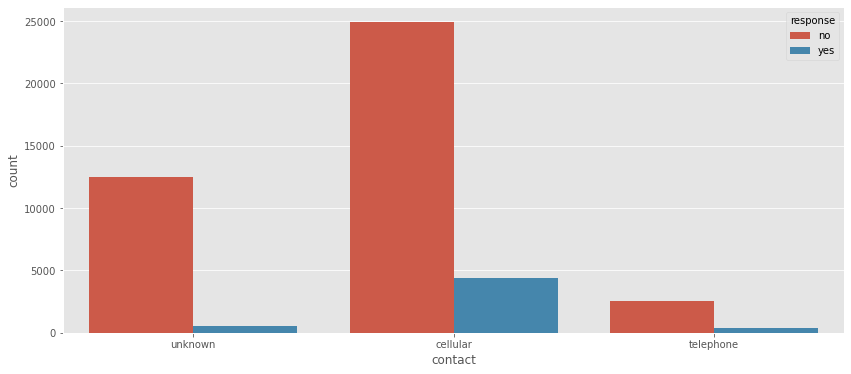

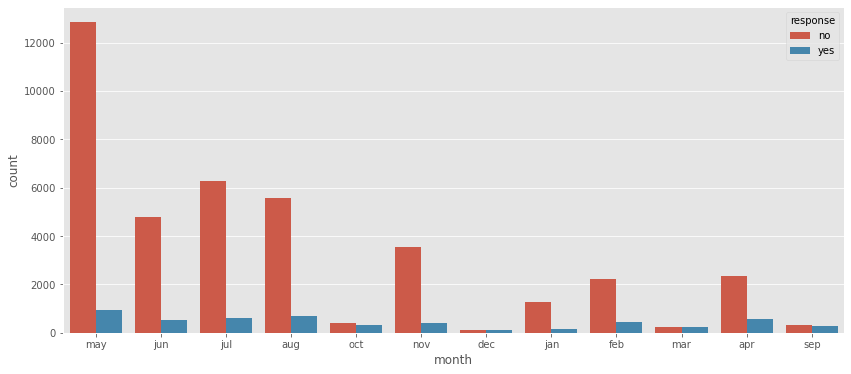

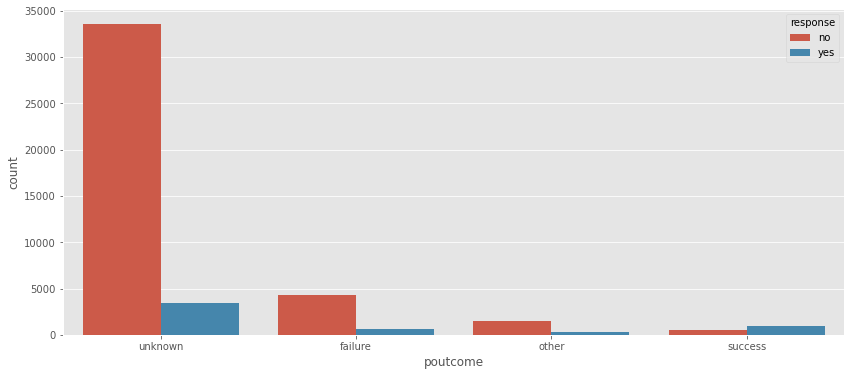

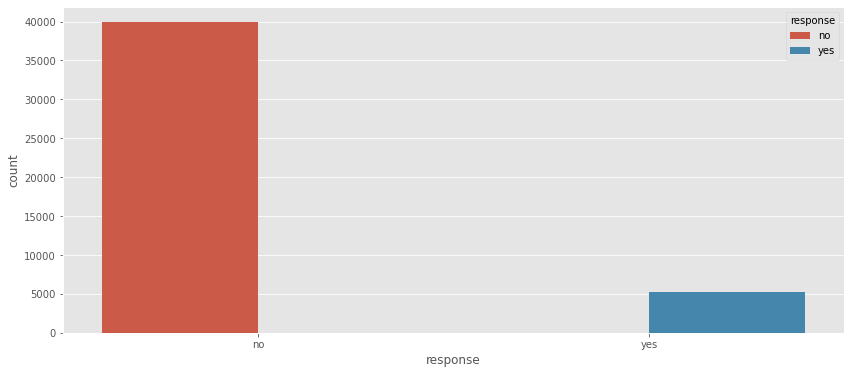

In [21]:
#plot the object features #
plt.style.use('ggplot')
#Create a loop that print all categorical variable against the attrition variable
for col in df.select_dtypes('object'):
    plt.figure(figsize=(14,6))
    sns.countplot(x=col,hue='response',data=df)

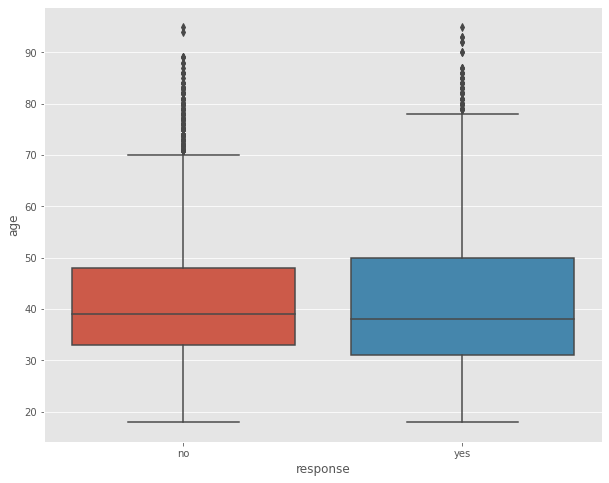

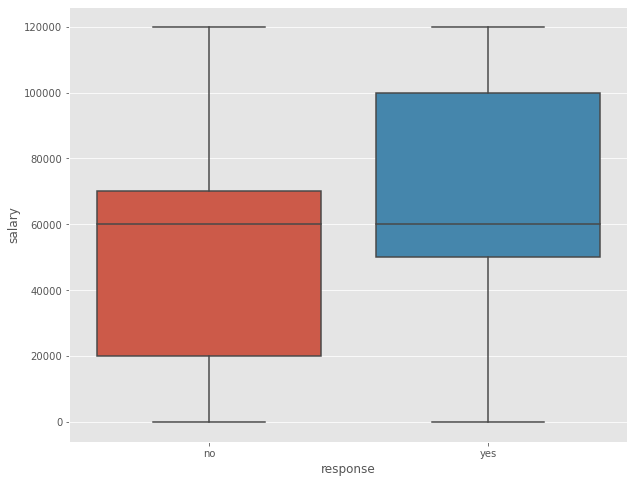

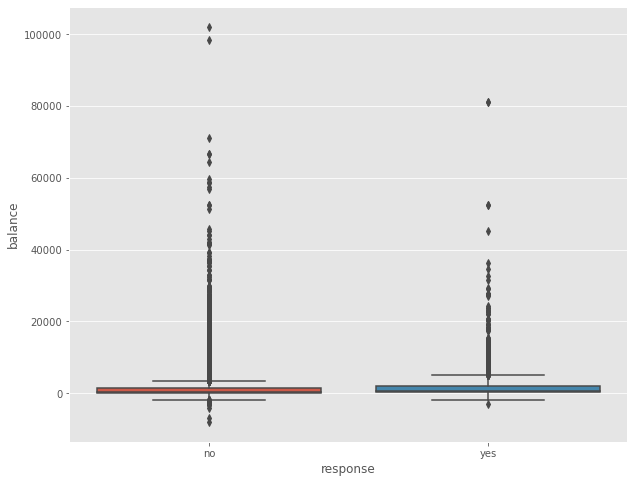

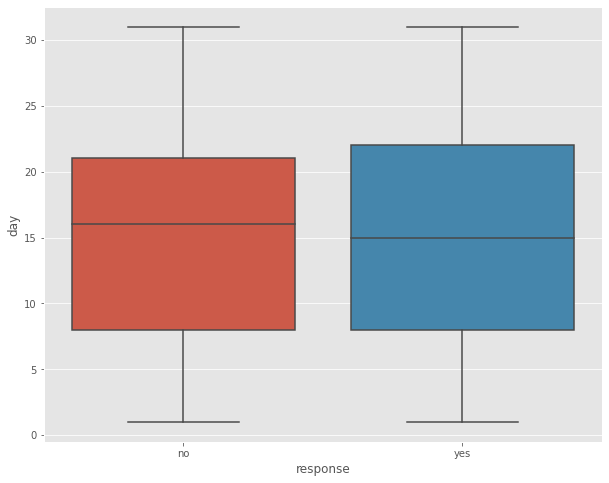

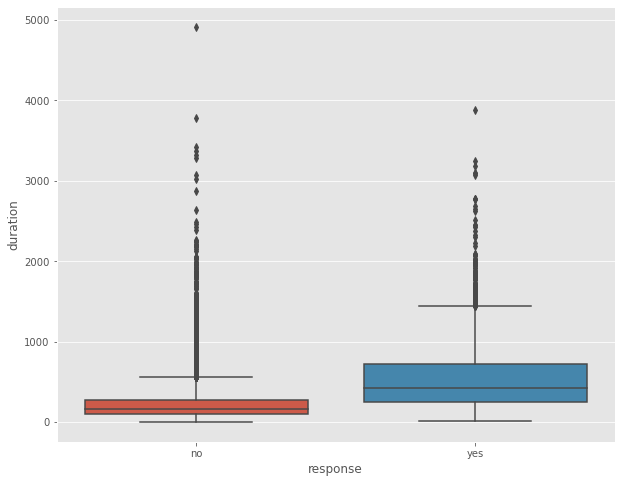

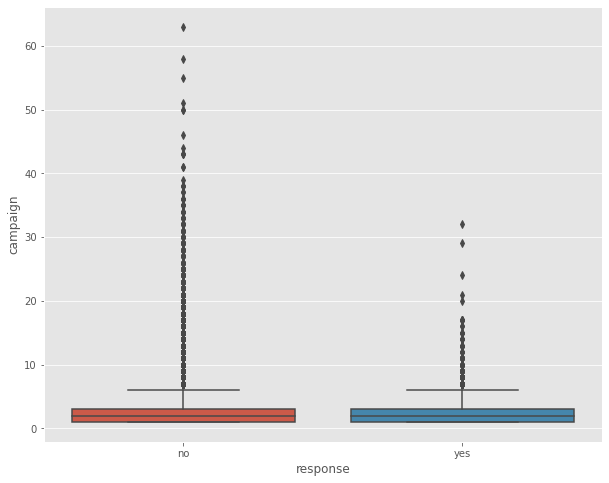

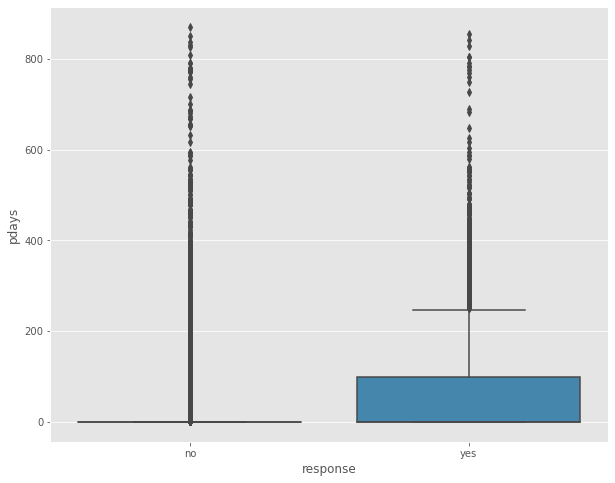

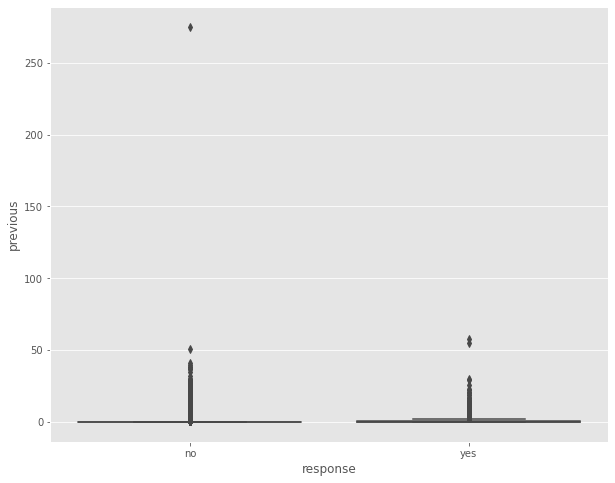

In [23]:
#plot the int features 
for col in df.select_dtypes('int64'):
    plt.figure(figsize=(10,8))
    sns.boxplot(x='response', y=col,data=df)

<AxesSubplot:>

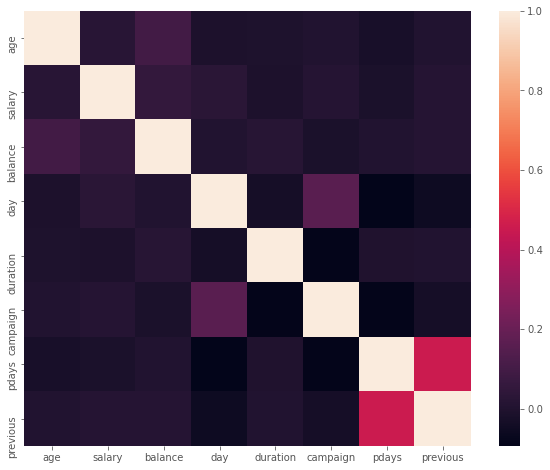

In [24]:
#Create heat map to see correlated features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())


FEATURES SELECTION


In [25]:
#Look for variables with low variances
df.var(axis=0)

age         1.127581e+02
salary      1.029493e+09
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

data preparation

In [39]:
#Preparation module
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

#Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
#Split X and y 
X= df.drop('response',axis=1)
y=df['response'].replace({'Yes':1,'No':0})

#split categorical , numerical and ordinal features
categorical = list(X.columns[X.dtypes=='object'])
ordinal = ['education','housing','job','marital']
numerical = list(X.drop(categorical + ordinal,axis=1))

#Transform numerical and categorical features
X_cat = pd.get_dummies(X[categorical]) #Transform categorical into 0 and 1
X_num = StandardScaler().fit_transform(X[numerical])
X_num = pd.DataFrame(X_num,columns=X[numerical].columns) #Transform the array back to a dataframe for future use

#Create the new X object and look at it
X_new = pd.concat([X_num,X_cat],axis=1)
X_new

,age,salary,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,1.339983,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,0.093308,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,1.963320,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,-1.153366,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-1.776703,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0.093308,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,2.831227,-0.062526,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,2.925401,-0.062526,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-1.153366,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,0,1,...,0,0,0,1,0,0,0,0,0,1


Split the data in train and test set

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X_new,y,test_size=0.30,shuffle=True)

print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (31647, 54)
X_test shape (13564, 54)
y_train shape (31647,)
y_test shape (13564,)


Dimensionality reduction using PCA (Principal Component Analysis)


In [34]:
# PCA to reduce the dimension and plot the graph
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>0.90)+1

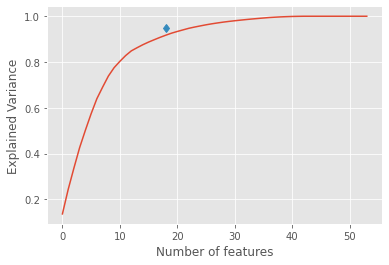

In [35]:
#Plot the variance curve against the number of features
plt.plot(cumsum)
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.plot(d,0.95,marker='d')

In [36]:
#check the number of features to keept
d

18

This section of code extracted the number of features that keeps 95% variance. In other words, 18 features could predict 90% of the attrition prediction. Although PCA algorithm normaly change the features and comprese those with high correlation together. I used it to simply show me how many feature I should keep. The next lines of code will use a SelectKBest model to choos 22 features among the 54 that are the best.

In [37]:
k=15
#Changing the Train set
selector = SelectKBest(f_classif,k=k)
selector.fit(X_train,y_train)

# Keep only the selected features into a new variable X_train_reduced
col=selector.get_support(indices=True)
X_train_reduced = X_train.iloc[:,col]

#Changing the Test set
selector.fit(X_test,y_test)

#Same as above
col=selector.get_support(indices=True)
X_test_reduced = X_test.iloc[:,col]

In [38]:
#Quick look at the new data
X_train_reduced

,duration,pdays,previous,job_retired,job_student,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
14666,-0.594750,-0.411453,-0.25194,0,0,1,0,1,0,0,0,0,0,0,1
4033,-0.602517,-0.411453,-0.25194,0,0,0,1,0,1,0,1,0,0,0,1
39736,-0.672413,-0.411453,-0.25194,0,0,1,0,1,0,0,1,0,0,0,1
6556,0.038198,-0.411453,-0.25194,0,0,0,1,0,1,0,1,0,0,0,1
19430,-0.086062,-0.411453,-0.25194,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19908,-0.571452,-0.411453,-0.25194,0,0,1,0,1,0,0,0,0,0,0,1
29497,-0.416127,-0.411453,-0.25194,0,0,1,0,1,0,0,0,0,0,0,1
15837,-0.027815,-0.411453,-0.25194,0,0,1,0,1,0,0,0,0,0,0,1
34043,-0.816088,-0.411453,-0.25194,0,0,0,1,1,0,0,0,0,0,0,1


Random Forest Classifier

In [40]:
#Create fit and score the model
rfc = RandomForestClassifier(n_estimators=700,max_depth=10,n_jobs=-1,random_state=123)
rfc_model = rfc.fit(X_train_reduced,y_train)

rfc_scores = cross_val_score(rfc,X_train_reduced,y_train,scoring='accuracy',cv=5)
print('This is train score',rfc_scores.mean())

This is train score 0.9022023849193899


In [42]:
#Predict the model
y_pred_rfc = rfc_model.predict(X_test_reduced)
print('This is test score: ',accuracy_score(y_pred_rfc,y_test))


This is test score:  0.8892657033323503


In [43]:
#Print the confusion_matrix
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred_rfc))

Confusion matrix:
[[11616   358]
 [ 1144   446]]


In [44]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94     11974
         yes       0.55      0.28      0.37      1590

    accuracy                           0.89     13564
   macro avg       0.73      0.63      0.66     13564
weighted avg       0.87      0.89      0.87     13564



In [46]:
# Create model that 
def plot_feature_importance(importance,names,model_type): 
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data) 
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True) 
    
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

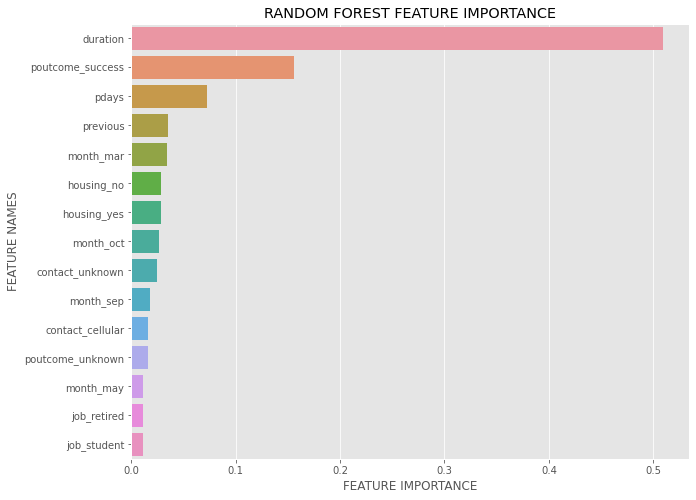

In [47]:
plot_feature_importance(rfc.feature_importances_,X_train_reduced.columns,'RANDOM FOREST')

# thanking you sir or madam